# Predictive Modeling: Vehicle Fuel Efficiency (MPG)


### **Objective:** Compare model performance using quantitative metrics and analyze feature importance.

### **Dataset:** modeling_dataset.csv

1. Setup and Data Loading

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

In [7]:
df = pd.read_csv("modeling_dataset.csv")

y = df["Combined MPG (FT1)"]
x = df.drop("Combined MPG (FT1)", axis=1)

Identify numeric and categorical features

In [ ]:
numeric_features = x.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = x.select_dtypes(include=['object', 'category']).columns.tolist()

Processing Pipeline

In [ ]:
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)


Get Feature Importance

In [ ]:
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", RandomForestRegressor(n_estimators=100, 
                                    random_state=42,
                                    n_jobs=-1))
])
model.fit(x, y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Year', 'Engine Cylinders',
                                                   'Engine Displacement']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Make', 'Model', 'Class',
                                                   'Drive', 'Transmission',
                                                   'Fuel Type'])])),
                ('model', RandomForestRegressor(n_jobs=-1, random_state=42))])

In [ ]:
encoded_cat_features = (
    model.named_steps["preprocessor"]
         .named_transformers_["cat"]
         .get_feature_names_out(categorical_features))

features = np.concatenate([numeric_features, encoded_cat_features])
importances = model.named_steps["model"].feature_importances_


In [ ]:
feat_imp = pd.DataFrame({
    "feature": features,
    "importance": importances
})

5.4.1 Top Ten List

In [ ]:
top10 = feat_imp.sort_values("importance", ascending=False).head(10)
print(top10)

                                            feature  importance
2                               Engine Displacement    0.679547
0                                              Year    0.091000
3889  Transmission_Automatic (variable gear ratios)    0.019546
1                                  Engine Cylinders    0.013558
3826                             Class_Midsize Cars    0.010154
3859                                  Drive_4-Wheel    0.009549
3858                                  Drive_2-Wheel    0.008801
3890                 Transmission_Automatic 3-Speed    0.008523
3902                    Transmission_Manual 5-Speed    0.005456
127                                 Make_Volkswagen    0.005280


5.4.2 Top Ten Bar Plot

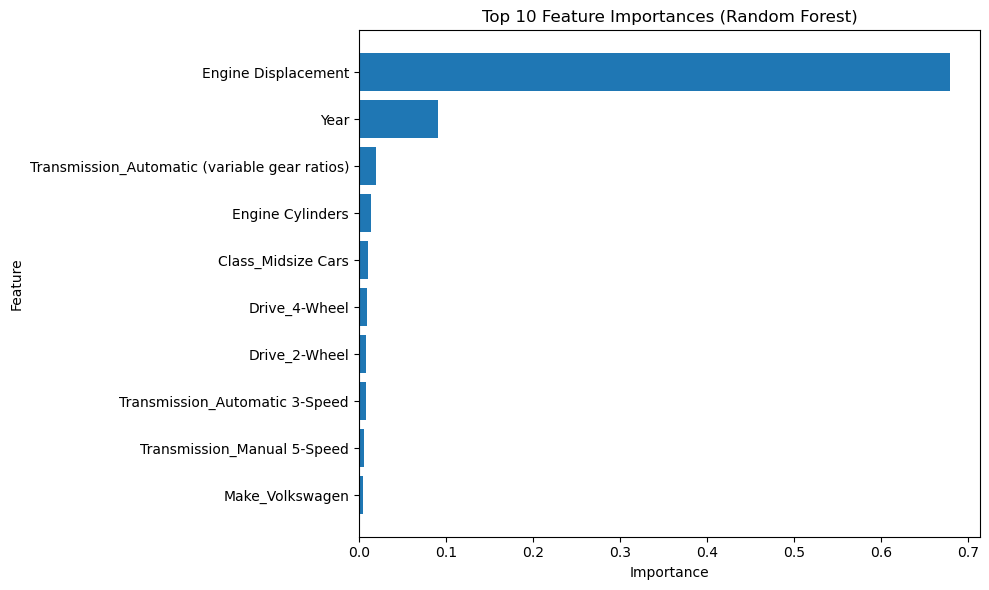

In [14]:
plt.figure(figsize=(10, 6))
plt.barh(top10["feature"], top10["importance"])
plt.gca().invert_yaxis()
plt.title("Top 10 Feature Importances (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

Insight Summary

Using the Random Forest model, it was found that Engine Displacement is the most important feature, followed by Year and certain automatic transmission types. This indicates that these features have the strongest influence on vehicle fuel efficiency. These results provide insight into the question: “Can vehicle fuel efficiency (Combined MPG) be accurately predicted using basic vehicle specifications, and which factors most strongly influence fuel economy?” Specifically, the analysis shows that larger engines and older vehicles tend to lower MPG, while newer models and advanced transmission designs tend to increase it, highlighting which specifications are most critical for predicting fuel efficiency.